Content List:

1. Import libraries
2. Import Data
3. Genre analysis

# 1. Import Libraries

In [1]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
import os 

# 2. Import Data

In [36]:
# Load the prepared data
path = r'C:\Users\HP\Anaconda Scripts\My Course\Personal Projects\Exploratory Data Analysis of Movie Trends'

prepared_data_path = os.path.join(path, '02 Data', 'Prepared Data', 'movies_data.csv')
movies_data_clean = pd.read_csv(prepared_data_path)

# Verify the DataFrame structure
print("First 5 rows of data:")
print(movies_data_clean[['original_title', 'genres']].head())
print("\nData types:")
print(movies_data_clean.dtypes)

First 5 rows of data:
                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                              genres  
0  ['Action', 'Adventure', 'Fantasy', 'Science Fi...  
1                 ['Adventure', 'Fantasy', 'Action']  
2                   ['Action', 'Adventure', 'Crime']  
3           ['Action', 'Crime', 'Drama', 'Thriller']  
4         ['Action', 'Adventure', 'Science Fiction']  

Data types:
budget                    int64
genres                   object
original_title           object
overview                 object
popularity              float64
production_companies     object
release_date             object
revenue                   int64
runtime                 float64
vote_average            float64
vote_count                int64


# 3. Genre Analysis

In [3]:
# Re-convert the string representation of lists back to list objects
movies_data_clean['genres'] = movies_data_clean['genres'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Check the data type of the first genre entry
print("Type of the first genres entry after re-evaluation:", type(movies_data_clean['genres'].iloc[0]))

Type of the first genres entry after re-evaluation: <class 'list'>


In [4]:
movies_data_clean['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
3224                                         [Comedy]
3225                          [Horror, Comedy, Crime]
3226               [Crime, Horror, Mystery, Thriller]
3227               [Science Fiction, Drama, Thriller]
3228                        [Action, Crime, Thriller]
Name: genres, Length: 3229, dtype: object

In [5]:
# Create a list containing all individual genres
all_genres = [genre for sublist in movies_data_clean['genres'] for genre in sublist]

In [6]:
# Genre counts using Counter
genre_frequency = Counter(all_genres)
genre_frequency

Counter({'Drama': 1441,
         'Comedy': 1110,
         'Thriller': 935,
         'Action': 918,
         'Adventure': 661,
         'Romance': 574,
         'Crime': 521,
         'Science Fiction': 431,
         'Family': 365,
         'Fantasy': 342,
         'Horror': 332,
         'Mystery': 265,
         'Animation': 188,
         'History': 145,
         'War': 120,
         'Music': 111,
         'Western': 57,
         'Documentary': 38,
         'Foreign': 5})

In [7]:
# Genre count displayed as dataframe
genre_counts = pd.DataFrame(genre_frequency.items(), 
                        columns=['Genre', 'Count']
                          ).sort_values(by='Count', ascending=False).reset_index(drop=True)
genre_counts

,Genre,Count
0,Drama,1441
1,Comedy,1110
2,Thriller,935
3,Action,918
4,Adventure,661
5,Romance,574
6,Crime,521
7,Science Fiction,431
8,Family,365
9,Fantasy,342


In [9]:
# Top 10 Most Frequent Genres
print("Top 10 Most Frequent Genres:")
print(genre_counts.head(10))

Top 10 Most Frequent Genres:
             Genre  Count
0            Drama   1441
1           Comedy   1110
2         Thriller    935
3           Action    918
4        Adventure    661
5          Romance    574
6            Crime    521
7  Science Fiction    431
8           Family    365
9          Fantasy    342


## 3.1 Visualization and Interpretation

In [13]:
# Set the visualization style
sns.set_style("whitegrid")

In [14]:
# Select the top 10 genres
top_10_genres = genre_counts.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_9036\2207896266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


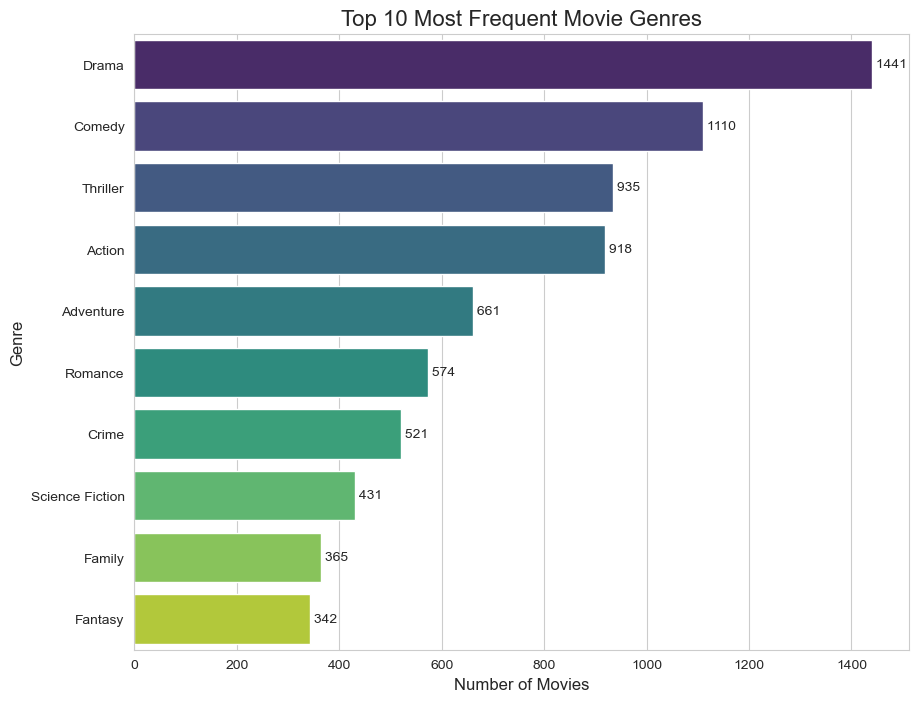

In [17]:
plt.figure(figsize=(10, 8))
# Create the horizontal bar plot
sns.barplot(
    x='Count', 
    y='Genre', 
    data=top_10_genres, 
    palette='viridis' # Use a distinct color palette
)

plt.title('Top 10 Most Frequent Movie Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)

for index, row in top_10_genres.iterrows():
    plt.text(row.Count, index, f' {row.Count}', va='center')

plt.show()

## 3.2 Genre Performance

In [18]:
# Explode the genres list so each genre gets its own row
genre_performance = movies_data_clean.explode('genres')

In [22]:
# Group by the single genre and calculate the mean revenue
genre_revenue = genre_performance.groupby('genres')['revenue'].mean().sort_values(ascending=False).head(10)
genre_revenue

genres
Animation          2.789174e+08
Adventure          2.476065e+08
Fantasy            2.383164e+08
Family             2.258299e+08
Science Fiction    1.887708e+08
Action             1.768149e+08
Thriller           1.101877e+08
Comedy             1.084794e+08
Mystery            1.020739e+08
War                1.007787e+08
Name: revenue, dtype: float64

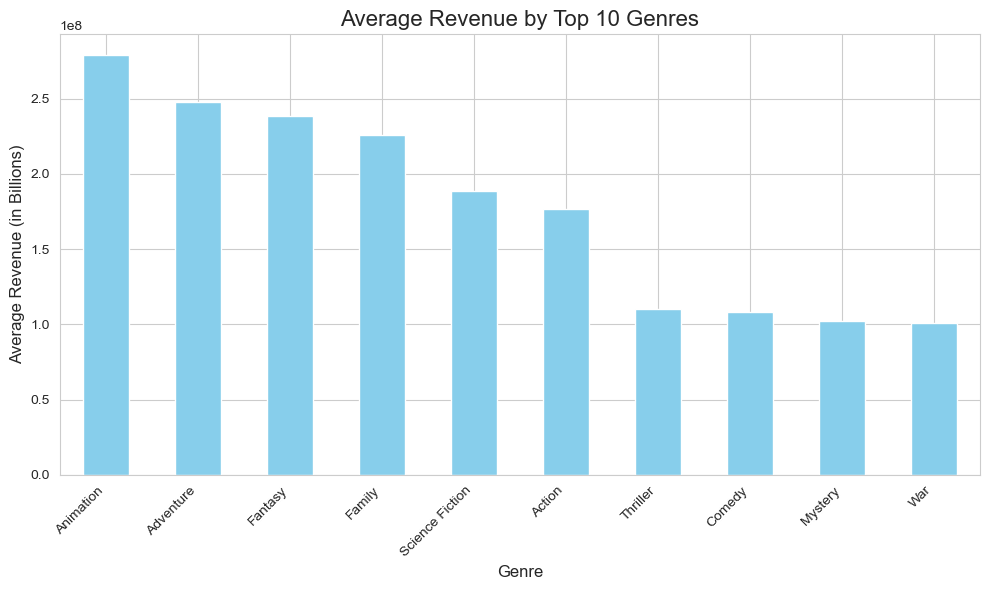

In [24]:
plt.figure(figsize=(10, 6))
genre_revenue.plot(kind='bar', color='skyblue')
plt.title('Average Revenue by Top 10 Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Revenue (in Billions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.3 Average revenue and ROI by genre

In [25]:
# Setting budget to NaN where it is zero to avoid division by zero
movies_data_clean['budget'].replace(0, np.nan, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9036\1919846216.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_data_clean['budget'].replace(0, np.nan, inplace=True)


In [26]:
# Calculate Profit (Revenue - Budget)
movies_data_clean['profit'] = movies_data_clean['revenue'] - movies_data_clean['budget']

In [27]:
# Calculate ROI (Return on Investment)
movies_data_clean['ROI'] = (movies_data_clean['profit'] / movies_data_clean['budget'])

In [28]:
# Drop rows where budget or revenue are missing (or 0 and set to NaN)
movies_data_clean.dropna(subset=['ROI'], inplace=True)

In [30]:
top_genres_list = genre_counts['Genre'].head(10)
top_genres_list

0              Drama
1             Comedy
2           Thriller
3             Action
4          Adventure
5            Romance
6              Crime
7    Science Fiction
8             Family
9            Fantasy
Name: Genre, dtype: object

In [31]:
genre_stats = []

# Iterate over the top 10 most frequent genres
for genre in top_genres_list:
    # Filter the dataset for movies belonging to the current genre
    genre_movies = movies_data_clean[movies_data_clean['genres'].apply(lambda x: genre in x)]
    
    # Calculate the average metrics for this subset of movies
    avg_revenue = genre_movies['revenue'].mean()
    avg_roi = genre_movies['ROI'].mean()
    
    # Append the results to the list
    genre_stats.append({
        'Genre': genre,
        'Avg_Revenue': avg_revenue,
        'Avg_ROI': avg_roi,
        'Movie_Count': len(genre_movies) # Keep track of how many movies were in the calculation
    })

In [33]:
# Convert the results to a DataFrame for plotting
genre_stats_df = pd.DataFrame(genre_stats).sort_values(by='Avg_Revenue', ascending=False)
print("Genre Performance Statistics:")
print(genre_stats_df)

Genre Performance Statistics:
             Genre   Avg_Revenue      Avg_ROI  Movie_Count
4        Adventure  2.476065e+08     3.458006          661
9          Fantasy  2.383164e+08     4.817778          342
8           Family  2.258299e+08     4.157520          365
7  Science Fiction  1.887708e+08     4.926710          431
3           Action  1.768149e+08     2.579040          918
2         Thriller  1.101877e+08  1073.897187          935
1           Comedy  1.084794e+08  7662.066247         1110
5          Romance  9.256247e+07     4.089232          574
6            Crime  8.790254e+07     3.238685          521
0            Drama  8.196813e+07  5907.024215         1441


C:\Users\HP\AppData\Local\Temp\ipykernel_9036\3420749103.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_stats_df, x='Genre', y='Avg_Revenue', palette='crest')


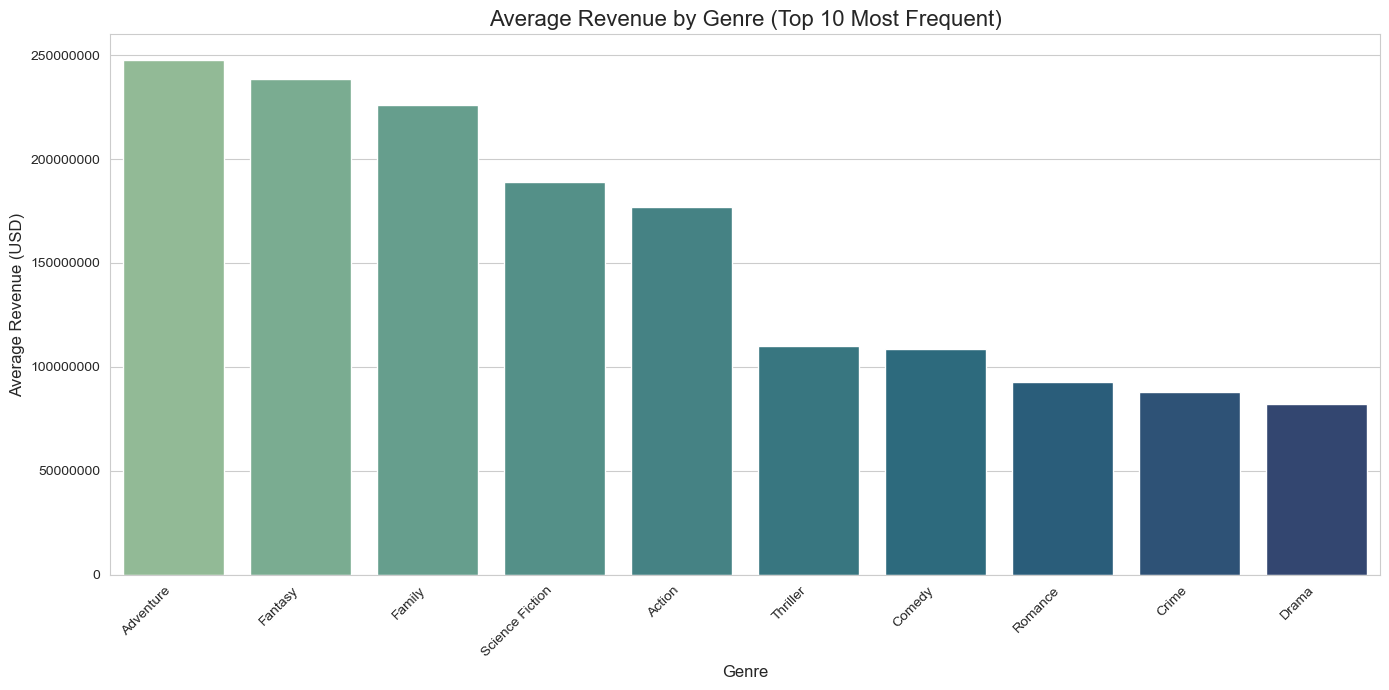

In [34]:
# Plotting Average Revenue by Genre

plt.figure(figsize=(14, 7))
sns.barplot(data=genre_stats_df, x='Genre', y='Avg_Revenue', palette='crest')
plt.title("Average Revenue by Genre (Top 10 Most Frequent)", fontsize=16)
# Format Y-axis to display values in billions (optional, but good for large numbers)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Average Revenue (USD)", fontsize=12)
plt.xlabel("Genre", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9036\1001902883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_stats_df, x='Genre', y='Avg_ROI', palette='mako')


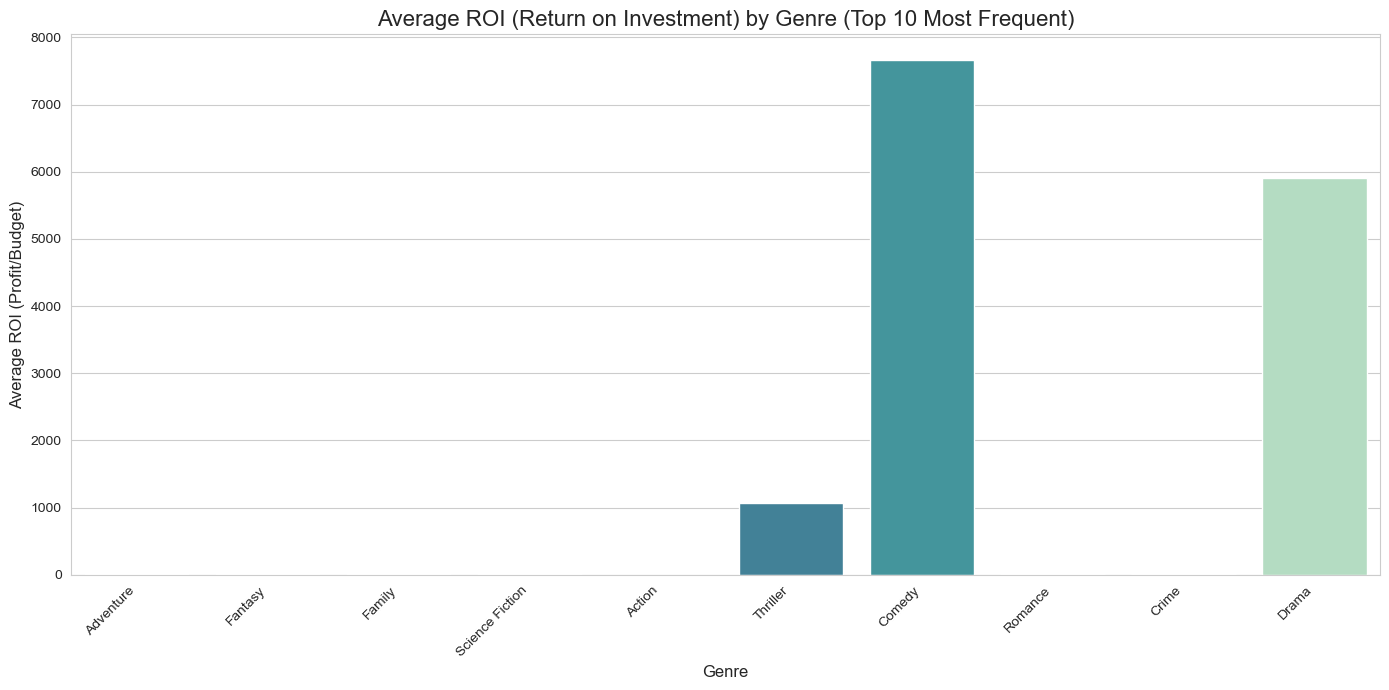

In [35]:
# Plotting Average ROI by Genre

plt.figure(figsize=(14, 7))
sns.barplot(data=genre_stats_df, x='Genre', y='Avg_ROI', palette='mako')
plt.title("Average ROI (Return on Investment) by Genre (Top 10 Most Frequent)", fontsize=16)
plt.ylabel("Average ROI (Profit/Budget)", fontsize=12)
plt.xlabel("Genre", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()